# VWAP with Tick Data v1

## Parameters
Parameters: &lt;side&gt; &lt;quantity&gt; [limit_px]  
side = "b" (buy) or "s" (sell)  
quantity = # of shares  
limit_px = limit price (optional)  

In [26]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime

matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )

def show_time( label_string ):
    ts = time.time()
    st = datetime.datetime.fromtimestamp( ts ).strftime( '%Y-%m-%d %H:%M:%S:%f' )
    print( label_string + ' : ' + st )

In [27]:
vwap_coefs = [  7.81292630e-03,  -6.23749840e-05,   3.13654288e-07, -7.63471095e-10,   7.19639892e-13]

# use coefs to make our target series
def vwap_target( bar_num, coefs ):
    return ( coefs[ 0 ] * bar_num + 
             coefs[ 1 ] * bar_num**2 + 
             coefs[ 2 ] * bar_num**3 +
             coefs[ 3 ] * bar_num**4 +
             coefs[ 4 ] * bar_num**5 )

In [28]:
trading_day.tail()

,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sale Condition,Trade Volume,Trade Price
Time,,,,,,,,,,
2018-01-17 16:00:00.225994751,K,AAPL,179.04,1.0,179.19,3.0,R,NaN,NaN,NaN
2018-01-17 16:00:00.256103027,P,AAPL,178.97,1.0,179.14,1.0,R,NaN,NaN,NaN
2018-01-17 16:00:00.279425940,P,AAPL,178.97,1.0,179.21,1.0,R,NaN,NaN,NaN
2018-01-17 16:00:00.458710938,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@,259.0,179.1
2018-01-17 16:00:00.477861757,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@ TW,314.0,179.1


### Initialization

In [29]:
# get our market data
# parsing of our pre-saved data is much simpler. We could also include 
taq = pd.read_csv( 'AAPL_20180117.gz', index_col = 0, parse_dates = True )

# set order parameters
order_side = "s"
order_quantity = 250000
# EFTR
# order_limit_price = 10.00

# generate target schedule - use bins 1 - 390 giving an automatic 1 minute "look ahead"
# note that targets have been converted to shares from percent
order_targets = vwap_target( np.arange( 0, 391 ), vwap_coefs ) * order_quantity

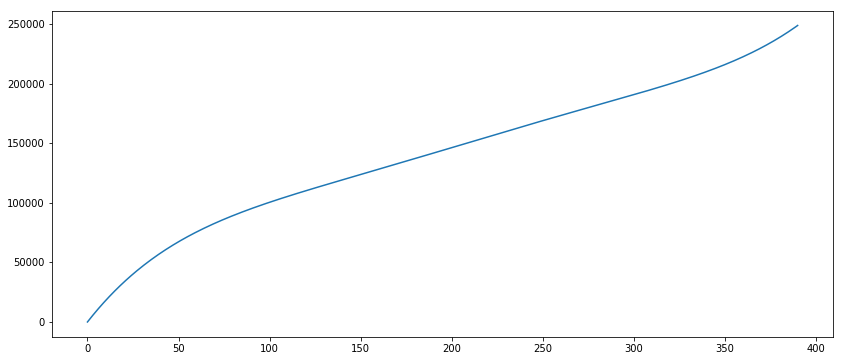

In [30]:
plt.plot(order_targets)

In [33]:
# check our data
taq.head()

,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sale Condition,Trade Volume,Trade Price
Time,,,,,,,,,,
2018-01-17 04:00:00.015039233,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@ TI,25.0,174.21
2018-01-17 04:00:00.015042660,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@ TI,1.0,174.21
2018-01-17 04:00:00.015050355,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@ TI,1.0,174.21
2018-01-17 04:00:00.015062641,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@ TI,73.0,174.21
2018-01-17 04:00:00.015072361,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@ T,127.0,174.21


In [32]:
# cut our data to market hours
trading_day = taq['2018-01-17 09:30:00':'2018-01-17 16:00:00']

In [34]:
trading_day.head()

,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sale Condition,Trade Volume,Trade Price
Time,,,,,,,,,,
2018-01-17 09:30:00.013454825,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@F I,44.0,176.15
2018-01-17 09:30:00.029276218,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@,100.0,176.15
2018-01-17 09:30:00.029355650,Z,AAPL,176.12,1.0,176.54,3.0,R,NaN,NaN,NaN
2018-01-17 09:30:00.029361349,Z,AAPL,175.71,3.0,176.54,3.0,R,NaN,NaN,NaN
2018-01-17 09:30:00.037869801,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@ I,70.0,176.10


In [35]:
len(trading_day)

699317

In [36]:
trading_day.head(1)

,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sale Condition,Trade Volume,Trade Price
Time,,,,,,,,,,
2018-01-17 09:30:00.013454825,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@F I,44.0,176.15


In [37]:
trading_day.tail(1)

,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sale Condition,Trade Volume,Trade Price
Time,,,,,,,,,,
2018-01-17 16:00:00.477861757,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,@ TW,314.0,179.1


In [38]:
# let's set up a container to hold trades. preinitialize with the index
trades = pd.DataFrame( columns = [ 'price' , 'shares', 'bar' ], index=trading_day.index )

### Event Loop

In [39]:
# main event loop
current_bar = 1
current_target = 0
quantity_filled = 0
quantity_remaining = order_quantity - quantity_filled
bid_price = 0.0
bid_quantity = 0.0
offer_price = 0.0
offer_quantity = 0.0
last_price = 0.0
last_quantity = 0.0
total_volume = 0.0
vwap_numerator = 0.0

show_time( 'start loop' )
for index, row in trading_day.iterrows():
    # figure out which minute we are in after the open
    time_from_open = ( index - pd.Timedelta( hours = 9, minutes = 30 ) )
    minutes_from_open = ( time_from_open.hour * 60 ) + time_from_open.minute
        
    # determine message type
    if ( pd.isnull( row[ 'Trade Price' ] ) ): # it's a quote
        # collect BBO
        bid_price = row[ 'Bid_Price' ]
        offer_price = row[ 'Offer_Price' ]
        
        # what's wrong with the lines below?
        bid_quantity = row[ 'Bid_Size' ] * 100 
        offer_quantity = row[ 'Offer_Size' ] * 100
    
    else: # it's a trade
        last_price = row[ 'Trade Price' ]
        last_quantity = row[ 'Trade Volume' ]
        
        # collect volume
        total_volume += last_quantity
        
        # collect rolling VWAP
        vwap_numerator += last_quantity * last_price

    # are we in a new minute?
    if ( minutes_from_open > current_bar ):
        # we're in a new bar do new bar things here
        current_bar = minutes_from_open
        current_target = min( np.ceil( order_targets[ current_bar ] ), order_quantity )
        #print ( str(current_bar) + ': ' + str( current_target ) )
        
    # trade logic
    # v1: are we behind the target at all? If so, do a trade, just pay the spread
    quantity_behind = current_target - quantity_filled
    if ( quantity_behind > 0 ): # we need to trade 
        # assume you can execute the full size across spread
        new_trade_quantity = quantity_behind
        if ( order_side == 'b' ):
            new_trade_price = offer_price
        else: 
            new_trade_price = bid_price
        
        trades.loc[ index ] = [ new_trade_price, new_trade_quantity, current_bar ]
        
        # update quantity remaining
        quantity_remaining = min( 0, quantity_remaining - new_trade_quantity )
        quantity_filled += new_trade_quantity    
        
# looping done
show_time( 'end loop' )

start loop : 2019-02-20 20:52:21:455947
end loop : 2019-02-20 20:54:22:088720


In [ ]:
# incidentally... trying to record into dataframe using this code... gave up after 40 minutes...
# new_row = pd.DataFrame( [[ new_trade_price, new_trade_quantity, order_side ]], 
#                              columns = [ 'fill_price' , 'fill_quantity', 'fill_side' ],
#                              index = [ index ] )
# trades = pd.concat( [ trades, pd.DataFrame( new_row ) ], ignore_index = False )

In [40]:
# Now, let's look at some stats
trades = trades.dropna()
day_vwap = vwap_numerator / total_volume
print( 'stock volume: ' + str( total_volume ) )
print( 'order shares traded: ' + str( quantity_filled ) )
avg_price = (trades[ 'price' ] * trades[ 'shares' ]).sum() / trades[ 'shares' ].sum()
print( 'average price: ' + str( avg_price ) )
print( 'day vwap: ' + str( day_vwap ) )
print( 'average trade size: ' + str( trades[ 'shares' ].mean() ) )

stock volume: 34760614.0
order shares traded: 248977.0
average price: 176.55202384155965
day vwap: 177.35551087423718
average trade size: 640.0437017994859


In [41]:
trades[ 'accum_shares' ] = trades[ 'shares' ].cumsum()

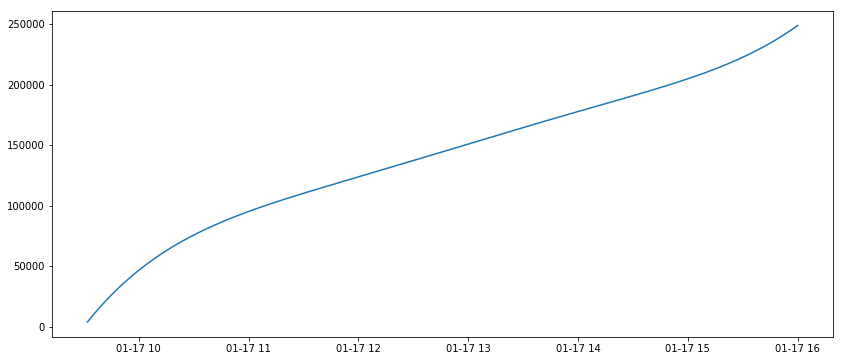

In [42]:
plt.plot(trades['accum_shares'])

Text(0.5, 1.0, 'realized trade prices')

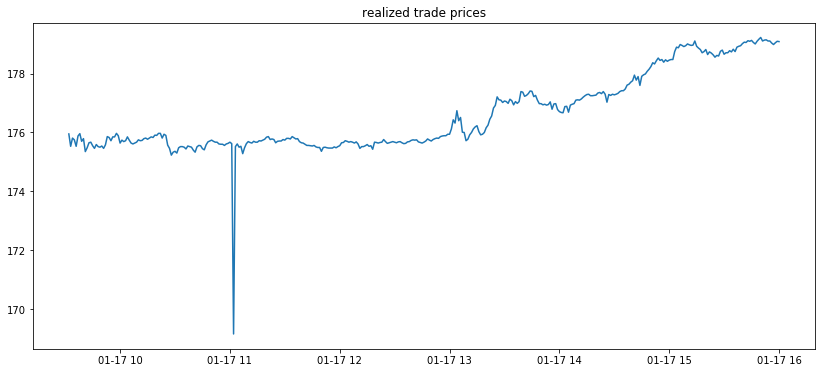

In [43]:
plt.plot(trades['price'])
plt.title('realized trade prices')

In [44]:
all_trades = trading_day[[ 'Trade Volume', 'Trade Price' ]].copy()
all_trades = all_trades.dropna()

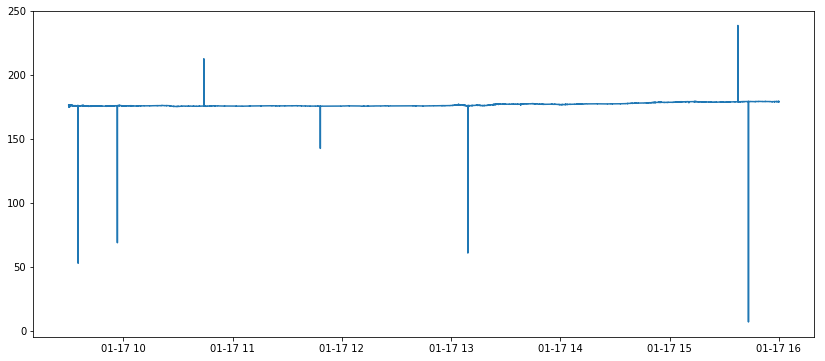

In [45]:
plt.plot( all_trades['Trade Price'] )

In [ ]:
# for now, let's ignore the extreme values and plot these together

day_plot = plt.plot( all_trades[ 'Trade Price' ], label = 'stock chart' )
trade_plot = plt.plot( trades[ 'price' ], label = 'Our Trade' )
plt.title( 'Our trades vs. the day' )
plt.ylim( 174, 180 )
plt.legend()